In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,KFold

In [2]:
data = pd.read_csv("real_estate.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
data.drop(["No","X1 transaction date"],axis=1,inplace=True)
data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data["area"] = data["X5 latitude"] * data["X6 longitude"]
data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,area
0,32.0,84.87882,10,24.98298,121.54024,37.9,3036.437385
1,19.5,306.59470,9,24.98034,121.53951,42.2,3036.098283
2,13.3,561.98450,5,24.98746,121.54391,47.3,3037.073589
3,13.3,561.98450,5,24.98746,121.54391,54.8,3037.073589
4,5.0,390.56840,5,24.97937,121.54245,43.1,3036.053829


In [5]:
data.isnull().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
area                                      0
dtype: int64

X2 house age


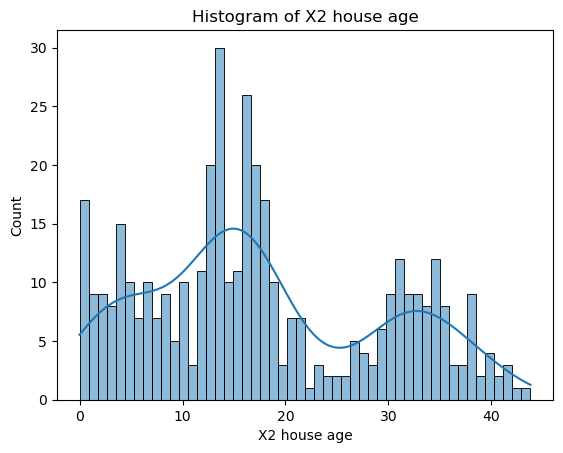

X3 distance to the nearest MRT station


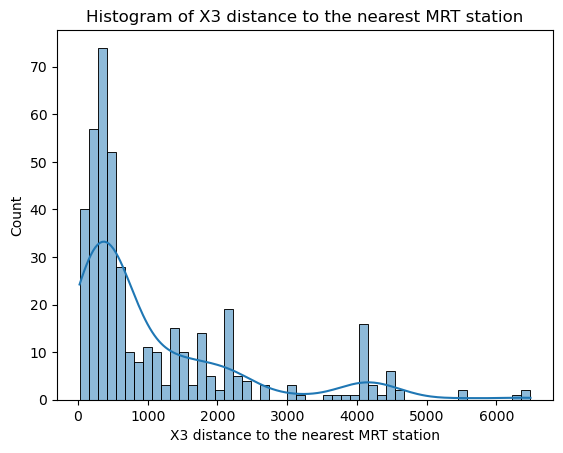

X4 number of convenience stores


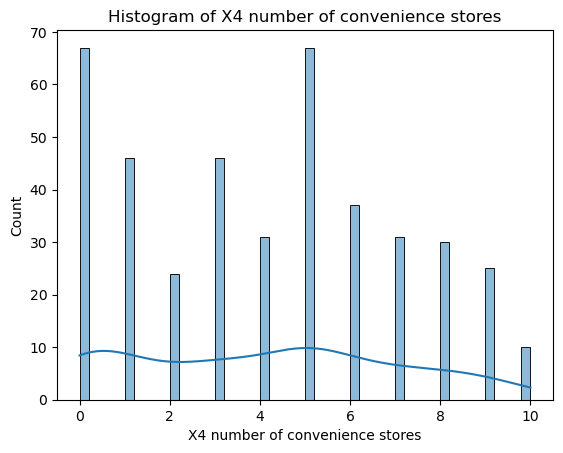

X5 latitude


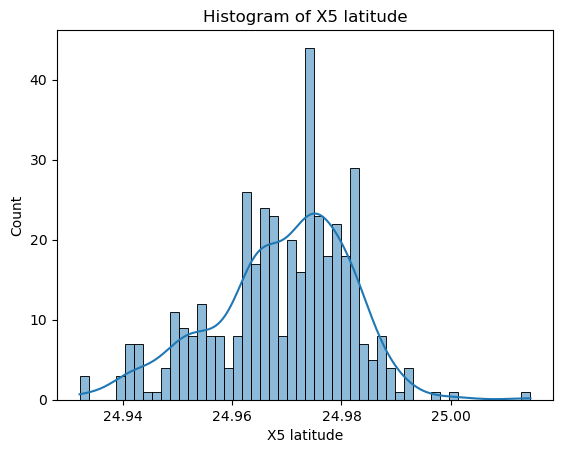

X6 longitude


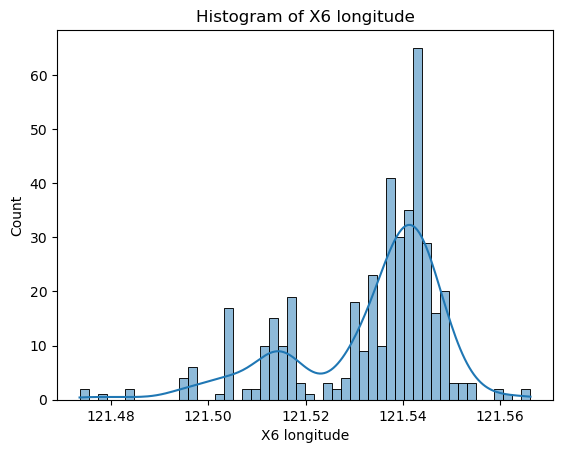

Y house price of unit area


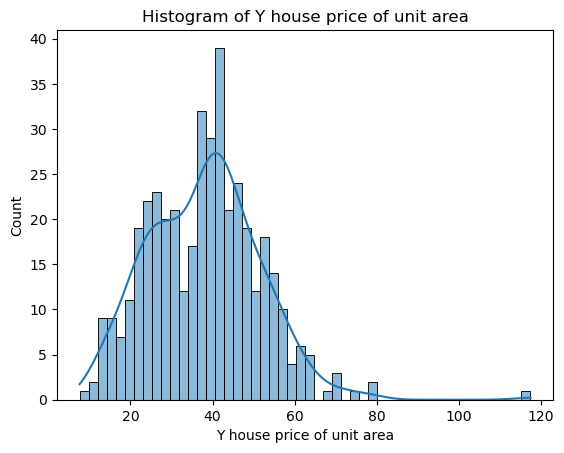

area


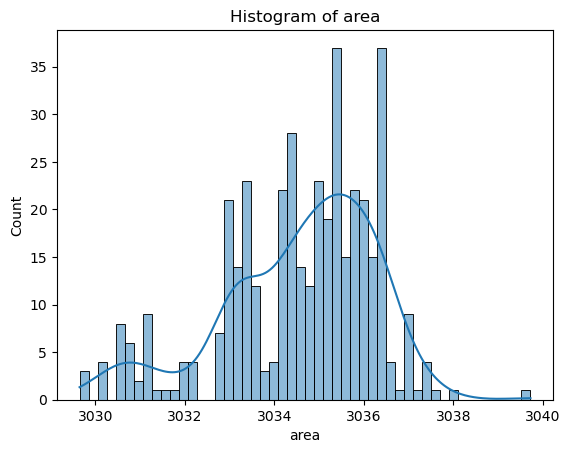

In [6]:
for col in data.columns:
    print(col)
    sns.histplot(data[col],bins=50,kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

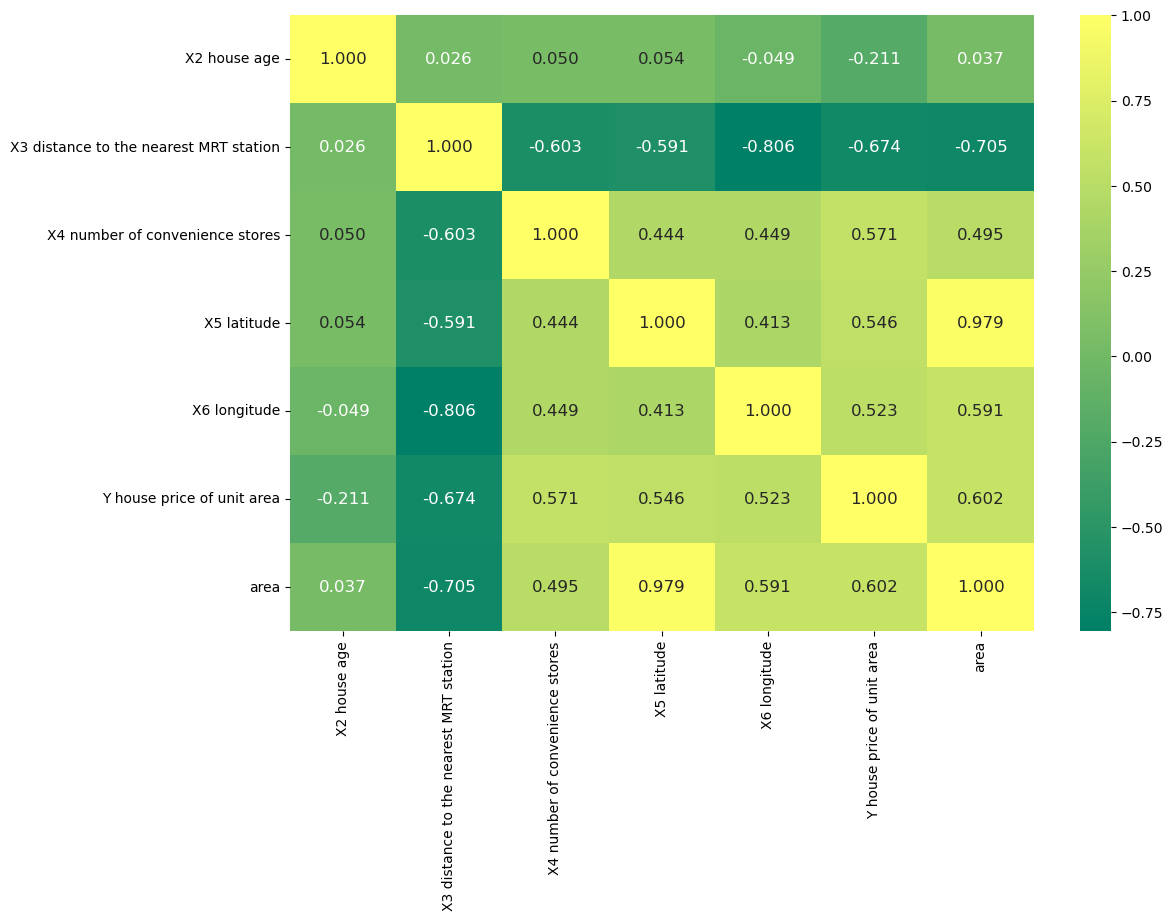

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap="summer", annot=True, fmt='.3f',annot_kws={"size": 12})
plt.show()

In [8]:
data.corr()["Y house price of unit area"]

X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Y house price of unit area                1.000000
area                                      0.601713
Name: Y house price of unit area, dtype: float64

X2 house age


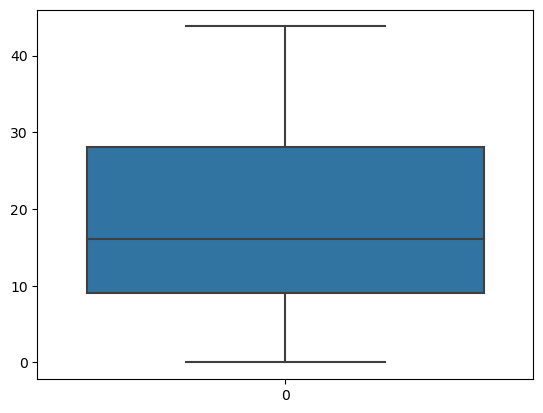


X3 distance to the nearest MRT station


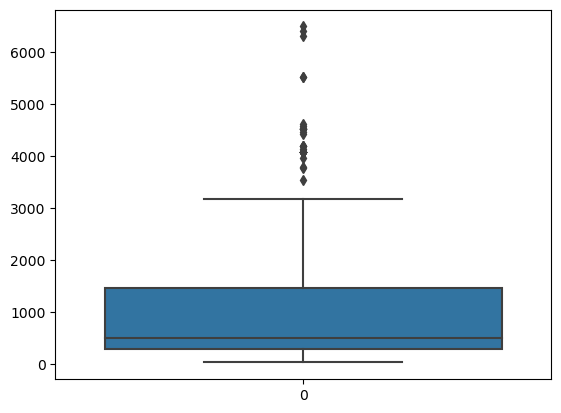


X4 number of convenience stores


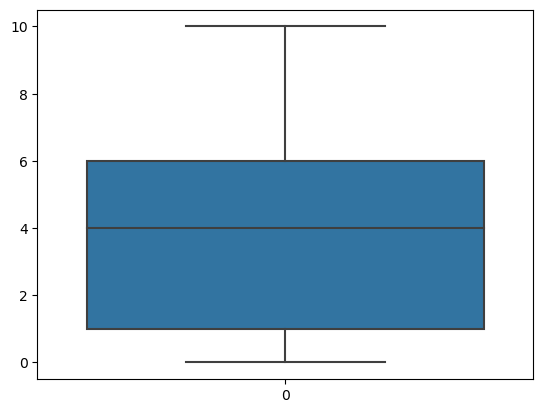


X5 latitude


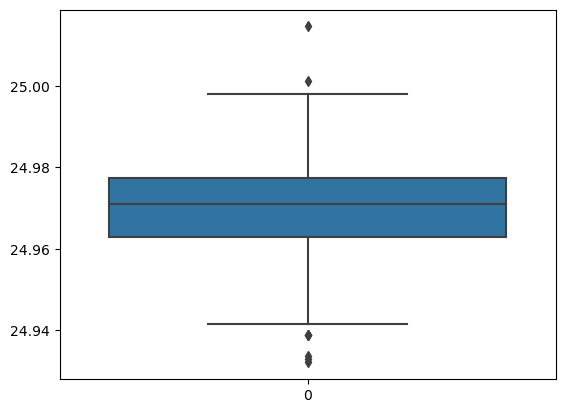


X6 longitude


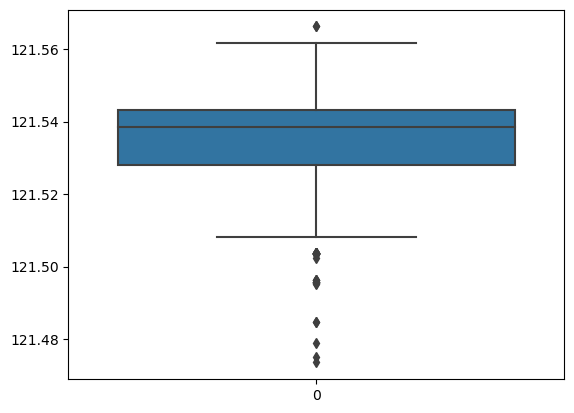


Y house price of unit area


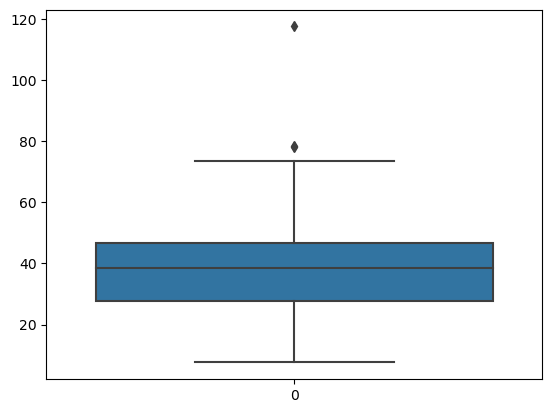


area


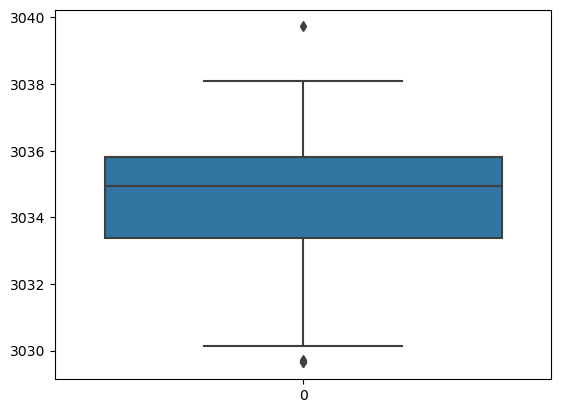

In [9]:
for col in data.columns:
    print(col)
    sns.boxplot(data[col])
    plt.show()
    print()

X2 house age


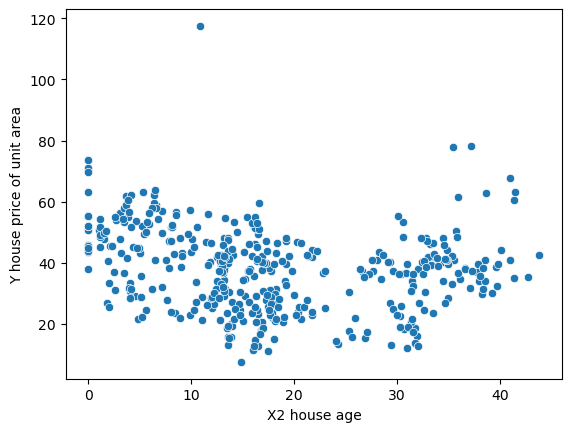


X3 distance to the nearest MRT station


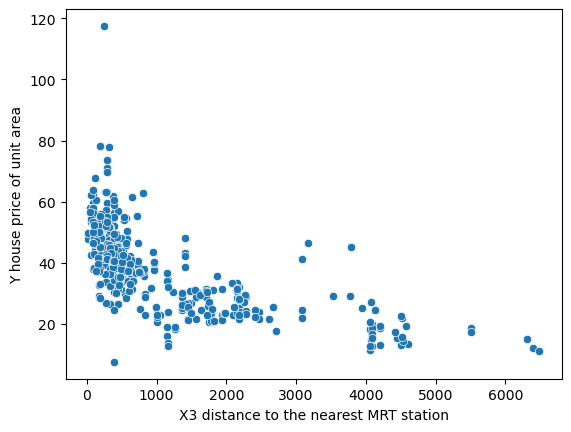


X4 number of convenience stores


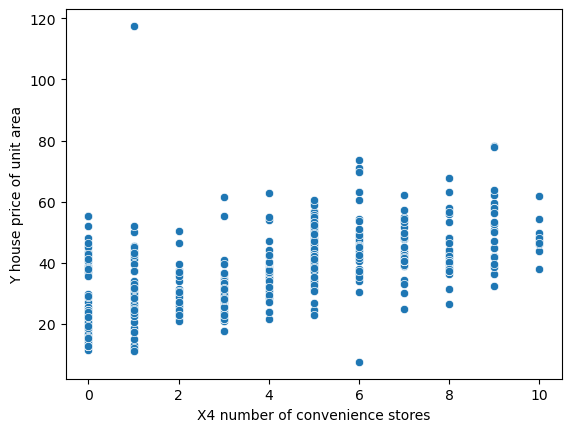


X5 latitude


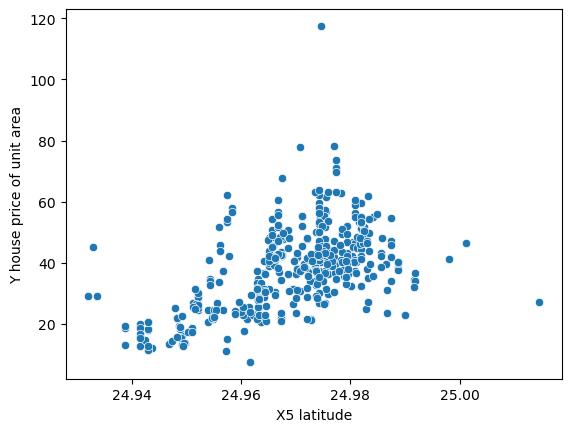


X6 longitude


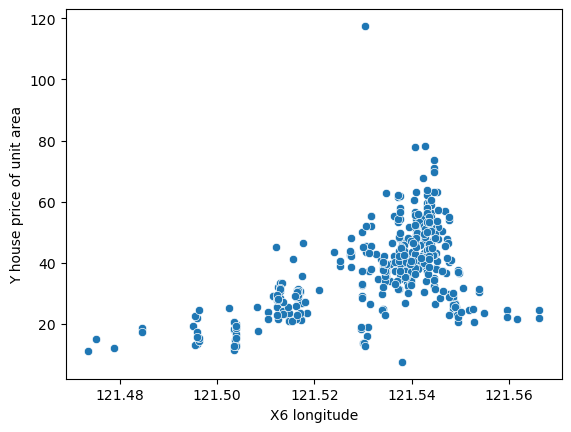


Y house price of unit area


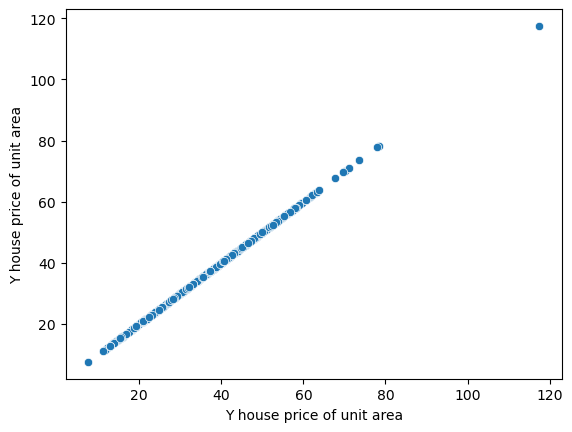


area


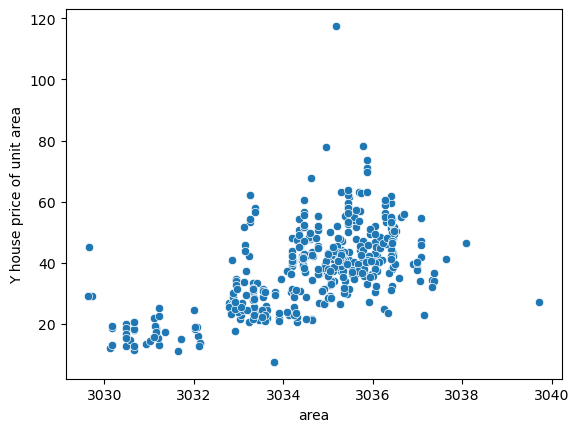

In [10]:
for col in data.columns:
    print(col)
    sns.scatterplot(x=col,y="Y house price of unit area",data=data)
    plt.show()
    print()

In [11]:
x = data.drop("Y house price of unit area",axis=1)
y = data["Y house price of unit area"]

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train.shape,x_test.shape

((331, 6), (83, 6))

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [15]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# multiple linear regression

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [17]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [18]:
import sklearn.metrics as mt

In [19]:
r2 = mt.r2_score(y_test,y_pred)
rmse = mt.mean_squared_error(y_test,y_pred,squared=False)
print(r2,rmse)

0.7235701812230508 6.809830818441814


# polynomial regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

degree = [2,3,4]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

for d in degree:
    poly_features = PolynomialFeatures(degree=d)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.transform(x_test)
    
    scaler_poly = StandardScaler()
    x_train_poly = scaler_poly.fit_transform(x_train_poly)
    x_test_poly = scaler_poly.transform(x_test_poly)
    
    model = LinearRegression()
    model.fit(x_train_poly,y_train)
    y_pred = model.predict(x_test_poly)
    
    r2 = mt.r2_score(y_test,y_pred)
    rmse = mt.mean_squared_error(y_test,y_pred,squared=False)
    print(f"degree:{d} --->    r2:{r2}    rmse:{rmse}")

degree:2 --->    r2:0.6354625931889764    rmse:7.820147200321209
degree:3 --->    r2:0.7538088280124189    rmse:6.42658292685759
degree:4 --->    r2:-28.206170995384696    rmse:69.99728412303197


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

poly_features = PolynomialFeatures(degree=3)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

scaler_poly = StandardScaler()
x_train_poly = scaler_poly.fit_transform(x_train_poly)
x_test_poly = scaler_poly.transform(x_test_poly)

model = LinearRegression()
model.fit(x_train_poly,y_train)

y_predTrain = model.predict(x_train_poly)   # overfitting ?
y_predTest = model.predict(x_test_poly)

r2Train = mt.r2_score(y_train,y_predTrain)
rmseTrain = mt.mean_squared_error(y_train,y_predTrain,squared=False)

r2Test = mt.r2_score(y_test,y_predTest)
rmseTest = mt.mean_squared_error(y_test,y_predTest,squared=False)

print(f"Train r2: {r2Train}    &    rmse: {rmseTrain}") 
print(f"Test  r2: {r2Test}     &    rmse: {rmseTest}")   

Train r2: 0.7502628131144511    &    rmse: 6.8536992175178
Test  r2: 0.7538088280124189     &    rmse: 6.42658292685759


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

scaler_poly = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Ridge Regression

In [23]:
from sklearn.linear_model import RidgeCV

alpha_values = [0.001, 0.0033, 0.01, 0.033, 0.1, 0.33, 1, 3.3, 10, 33.3, 100]
ridge_cv = RidgeCV(alphas=alpha_values,scoring="r2")

In [24]:
ridge_cv.fit(x_train,y_train)
ridge_cv.alpha_

10.0

In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)

ridge.fit(x_train,y_train)

y_pred = ridge.predict(x_test)
    
r2 = mt.r2_score(y_test,y_pred)
rmse = mt.mean_squared_error(y_test,y_pred,squared=False)
print(r2,rmse)

0.6766187826184975 7.365483718709057


# Lasso Regression

In [26]:
from sklearn.linear_model import Lasso,LassoCV

lamb = LassoCV(cv=10,max_iter=10000).fit(x_train,y_train).alpha_
lamb

0.12772324957583225

In [27]:
lasso = Lasso(alpha=lamb)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)

r2 = mt.r2_score(y_test,y_pred)
rmse = mt.mean_squared_error(y_test,y_pred,squared=False)
print(r2,rmse)

0.6760390627386832 7.3720827497729


# ElasticNet Regression

In [28]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

lamb = ElasticNetCV(cv=10,max_iter=10000).fit(x_train,y_train).alpha_
lamb

0.09617396713758834

In [29]:
enr = ElasticNet(alpha=lamb)
enr.fit(x_train,y_train)
y_pred = enr.predict(x_test)

r2 = mt.r2_score(y_test,y_pred)
rmse = mt.mean_squared_error(y_test,y_pred,squared=False)
print(r2,rmse)

0.6771862317142029 7.359018636696364


# MLPRegressor

In [30]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 50, 100), max_iter=10000, random_state=42)  
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = mt.r2_score(y_test,y_pred)
rmse = mt.mean_squared_error(y_test,y_pred,squared=False)
print(r2,rmse)

0.7861714474980719 5.989309086936344


# SGDRegressor

In [31]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=10000, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = mt.r2_score(y_test,y_pred)
rmse = mt.mean_squared_error(y_test,y_pred,squared=False)
print(r2,rmse)

0.6771533342944065 7.359393599882047


# SVR

In [66]:
from sklearn.svm import SVR

svr = SVR()

In [67]:
from sklearn.model_selection import GridSearchCV,KFold

cv = KFold(n_splits=10,shuffle=True,random_state=42)

In [68]:
param_grid = {
    "C": [0.1, 1]
    #,'kernel': ['linear', 'rbf', 'poly'],
    #,'degree': [2, 3]
    #,'epsilon': [0.1, 0.2, 0.3]
}

In [69]:
grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=cv)
grid_search.fit(x, y)

print("Best Parameters: ", grid_search.best_params_)
print("rmse: ", np.sqrt(-1 * grid_search.best_score_))

Best Parameters:  {'C': 1}
rmse:  9.801016547937742


In [70]:
svr = SVR(C=1,kernel="rbf")
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

r2 = mt.r2_score(y_test,y_pred)
rmse = mt.mean_squared_error(y_test,y_pred,squared=False)
print(r2,rmse)

0.671636513529502 7.422006103478305


# Decision Tree Regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

dt = DecisionTreeRegressor(random_state=42)

In [39]:
cv = KFold(n_splits=10,shuffle=True,random_state=42)

param_grid = {
    "min_samples_split":range(2,5),
    "max_depth":range(2,5)
    #,"max_leaf_nodes":range(2,15),
    #"criterion":["gini","entropy"]
}

In [42]:
grid_search = GridSearchCV(estimator=dt,param_grid=param_grid,cv=cv,scoring="neg_mean_squared_error")

grid_search.fit(x_train,y_train)

print("Best Parameters: ", grid_search.best_params_)
print("rmse: ", np.sqrt(-1 * grid_search.best_score_))

Best Parameters:  {'max_depth': 2, 'min_samples_split': 2}
rmse:  9.099771792351694


In [45]:
best_dt_model = grid_search.best_estimator_

y_pred = best_dt_model.predict(x_test)

r2 = mt.r2_score(y_test,y_pred)
rmse = mt.mean_squared_error(y_test,y_pred,squared=False)
print(r2,rmse)

0.6857531142022857 7.260714653373223


[Text(0.5, 0.8333333333333334, 'X3 distance to the nearest MRT station <= -0.191\nsquared_error = 188.091\nsamples = 331\nvalue = 38.392'),
 Text(0.25, 0.5, 'X2 house age <= -0.494\nsquared_error = 121.461\nsamples = 212\nvalue = 45.455'),
 Text(0.125, 0.16666666666666666, 'squared_error = 125.515\nsamples = 77\nvalue = 52.186'),
 Text(0.375, 0.16666666666666666, 'squared_error = 78.574\nsamples = 135\nvalue = 41.616'),
 Text(0.75, 0.5, 'area <= 0.271\nsquared_error = 59.546\nsamples = 119\nvalue = 25.808'),
 Text(0.625, 0.16666666666666666, 'squared_error = 33.299\nsamples = 99\nvalue = 23.575'),
 Text(0.875, 0.16666666666666666, 'squared_error = 42.636\nsamples = 20\nvalue = 36.86')]

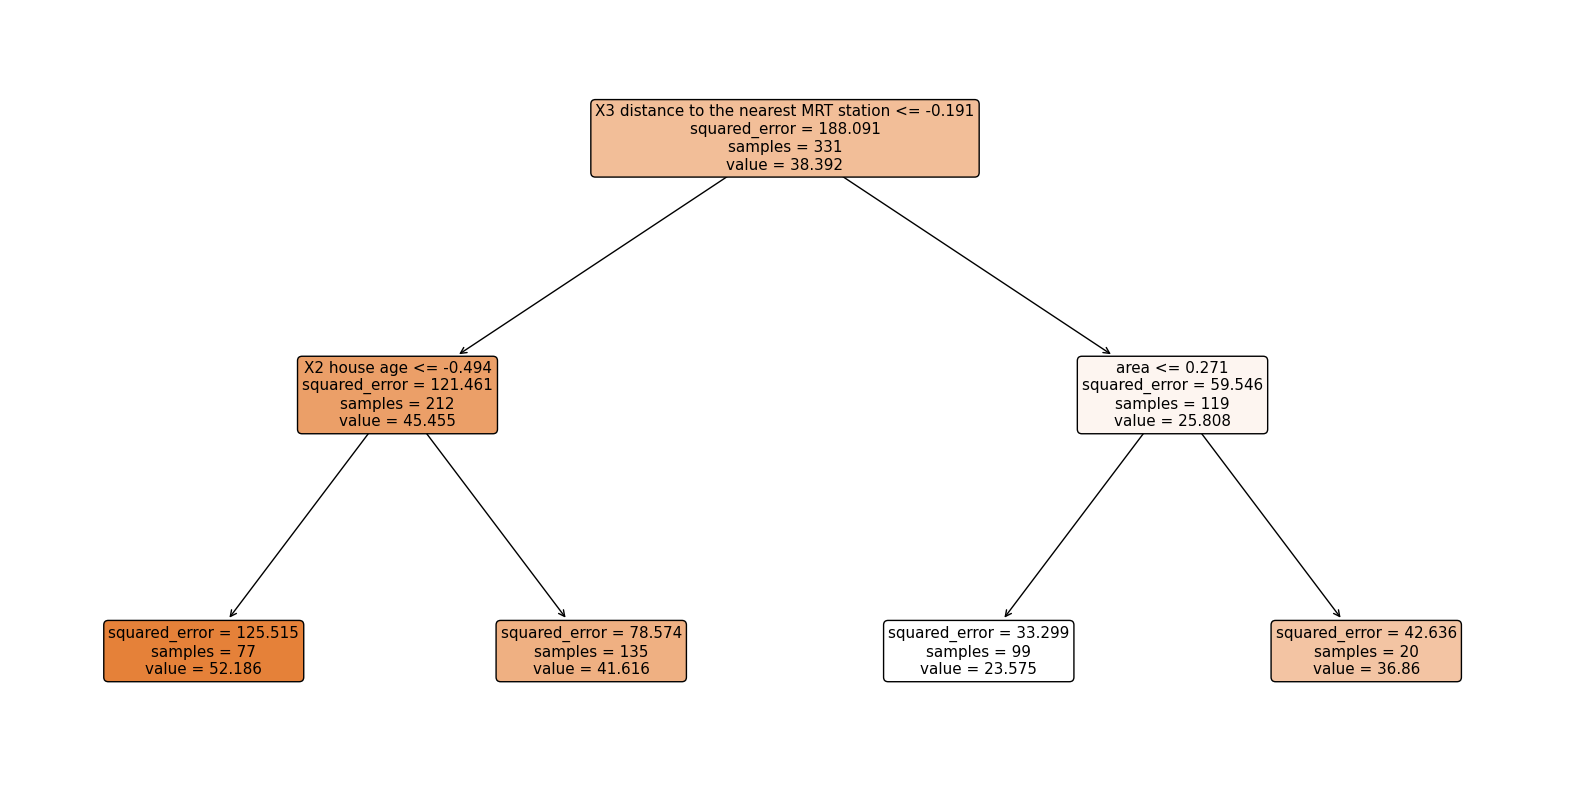

In [50]:
plt.figure(figsize=(20,10),dpi=100)
plot_tree(best_dt_model,feature_names=list(data.drop("Y house price of unit area",axis=1).columns),class_names="Y house price of unit area",rounded=True,filled=True)

# Bagging Decision Tree Regressor

In [52]:
from sklearn.ensemble import BaggingRegressor

bgmodel = BaggingRegressor(random_state=0)

In [53]:
cv = KFold(n_splits=10,shuffle=True,random_state=42)

param_grid = {
    "n_estimators":range(5,15)
}

In [54]:
grid_seach = GridSearchCV(estimator=bgmodel,param_grid=param_grid,cv=cv,scoring="neg_mean_squared_error")

grid_seach.fit(x_train,y_train)

print("Best Parameters: ", grid_search.best_params_)
print("rmse: ", np.sqrt(-1 * grid_search.best_score_))

Best Parameters:  {'max_depth': 2, 'min_samples_split': 2}
rmse:  9.099771792351694


In [56]:
best_bg_model = grid_search.best_estimator_

y_pred = best_bg_model.predict(x_test)

r2 = mt.r2_score(y_test,y_pred)
rmse = mt.mean_squared_error(y_test,y_pred,squared=False)
print(r2,rmse)

0.6857531142022857 7.260714653373223


# Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)

In [62]:
cv = KFold(n_splits=10,shuffle=True,random_state=42)

param_grid = {
    "max_depth":range(2,5),
    "n_estimators":range(5,25)
}

In [63]:
grid_seach = GridSearchCV(estimator=rf,param_grid=param_grid,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)

grid_seach.fit(x_train,y_train)

print("Best Parameters: ", grid_search.best_params_)
print("rmse: ", np.sqrt(-1 * grid_search.best_score_))

Best Parameters:  {'max_depth': 2, 'min_samples_split': 2}
rmse:  9.099771792351694


In [64]:
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(x_test)

r2 = mt.r2_score(y_test,y_pred)
rmse = mt.mean_squared_error(y_test,y_pred,squared=False)
print(r2,rmse)

0.6857531142022857 7.260714653373223


# PCA

In [72]:
from sklearn.decomposition import PCA

pca = PCA()

x_train2 = pca.fit_transform(x_train)
x_test2 = pca.transform(x_test)

In [73]:
x_train.shape,x_train2.shape

((331, 6), (331, 6))

In [76]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.56864078 0.73975446 0.87618466 0.97197024 1.         1.        ]


In [84]:
from sklearn.model_selection import cross_val_score

lrcv = LinearRegression()
rmse = []
cv = KFold(n_splits=10,shuffle=True,random_state=1)

for i in range(1,x_train2.shape[1]+1):
    pca = PCA(n_components=i)
    
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca=  pca.transform(x_test)
    
    err = cross_val_score(lrcv,x_train_pca,y_train,cv=cv,scoring="neg_mean_squared_error").mean()
    
    err = np.sqrt(-1*err)
    
    rmse.append(err)
    
rmse

[10.088875796725894,
 9.705992255726402,
 9.728360011035386,
 9.52319943509521,
 9.422984871623992]

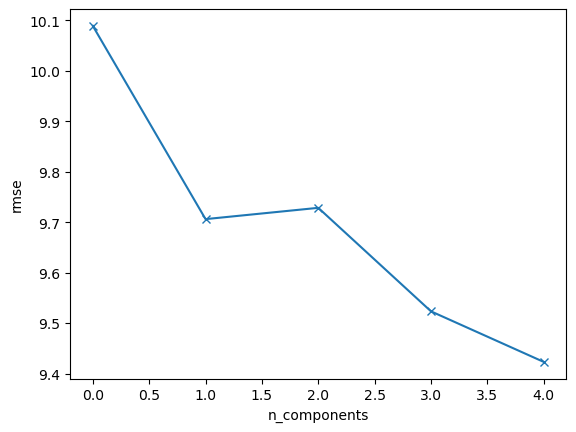

In [85]:
plt.plot(rmse,"-x")
plt.xlabel("n_components")
plt.ylabel("rmse")
plt.show()

In [86]:
pca = PCA(n_components=5)

x_train2 = pca.fit_transform(x_train)
x_test2 = pca.transform(x_test)

lr_pca = LinearRegression()
lr_pca.fit(x_train2,y_train)

y_pred = lr_pca.predict(x_test2)

r2 = mt.r2_score(y_test,y_pred)
rmse = mt.mean_squared_error(y_test,y_pred,squared=False)
print(r2,rmse)

0.674653647600411 7.387829245397472


In [87]:
# PCA and MLPRegressor

from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 50, 100), max_iter=10000, random_state=42)  
model.fit(x_train2, y_train)
y_pred = model.predict(x_test2)

r2 = mt.r2_score(y_test,y_pred)
rmse = mt.mean_squared_error(y_test,y_pred,squared=False)
print(r2,rmse)

0.7855127763434633 5.998526639390564
